<a href="https://colab.research.google.com/github/gelborin/projetoaplicado1_AAAEV/blob/main/vacina%C3%A7%C3%A3o-metadados.csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [117]:
# Carregar o dataset de metadados de vacinação
df = pd.read_csv('https://raw.githubusercontent.com/gelborin/projetoaplicado1_AAAEV/refs/heads/main/dataset/Global%20COVID-19%20Data%20(2020-2024)/Global%20COVID-19%20Data%20(2020-2024)/vaccination-metadata.csv', sep=';')

In [118]:
# Exibir as primeiras linhas do dataset
df.head()

,ISO3,PRODUCT_NAME,VACCINE_NAME,COMPANY_NAME,AUTHORIZATION_DATE,START_DATE,END_DATE,COMMENT,DATA_SOURCE
0,SHN,AZD1222,AstraZeneca - AZD1222,AstraZeneca,NaN,NaN,NaN,NaN,OWID
1,GRL,mRNA-1273,Moderna - mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
2,FRO,mRNA-1273,Moderna - mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
3,FRO,Comirnaty,Pfizer BioNTech - Comirnaty,Pfizer BioNTech,NaN,NaN,NaN,NaN,OWID
4,JEY,mRNA-1273,Moderna - mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID


In [119]:
# Dimensões do dataset (número de linhas e colunas)
df.shape

(1105, 9)

In [209]:
# Calcular quantidade de valores NaN
total_nan = df.isnull().sum().sum()

print(f"Total de valores NaN: {total_nan}")

Total de valores NaN: 5023


In [120]:
# Tipos de dados de cada coluna
df.dtypes

,0
ISO3,object
PRODUCT_NAME,object
VACCINE_NAME,object
COMPANY_NAME,object
AUTHORIZATION_DATE,object
START_DATE,object
END_DATE,float64
COMMENT,float64
DATA_SOURCE,object


In [192]:
# Valores ausentes
df.isnull().sum()

,0
ISO3,0
PRODUCT_NAME,7
VACCINE_NAME,0
COMPANY_NAME,51
AUTHORIZATION_DATE,928
START_DATE,795
END_DATE,1105
COMMENT,1105
DATA_SOURCE,0


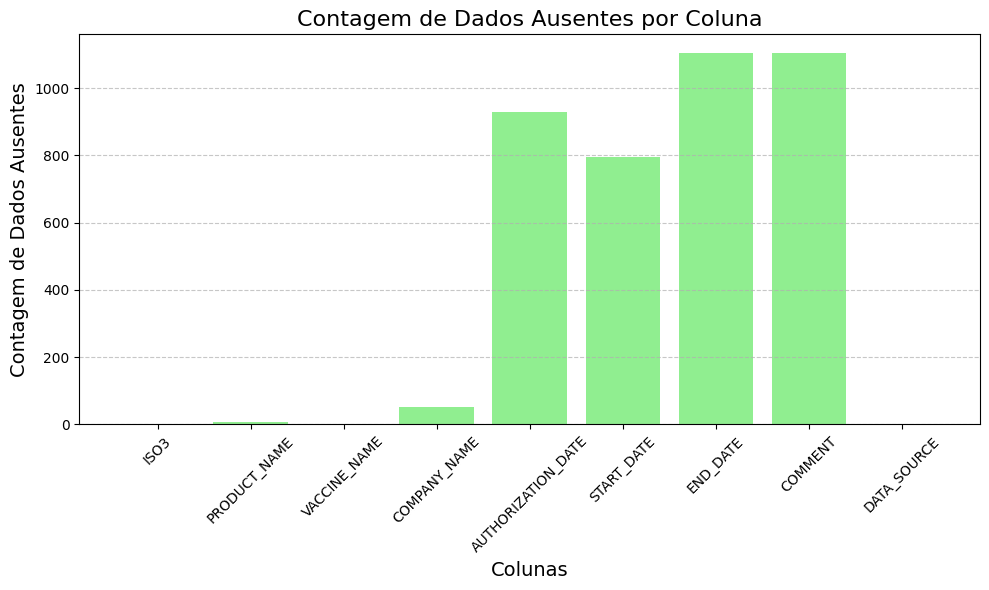

In [197]:
# Criar gráfico de barras
dados_ausentes = df.isnull().sum()
plt.figure(figsize=(10, 6))
plt.bar(dados_ausentes.index, dados_ausentes.values, color='lightgreen')
plt.title('Contagem de Dados Ausentes por Coluna', fontsize=16)
plt.xlabel('Colunas', fontsize=14)
plt.ylabel('Contagem de Dados Ausentes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [122]:
# Porcentagem de dados ausentes em cada coluna
(df.isnull().sum() / df.shape[0]) * 100

,0
ISO3,0.000000
PRODUCT_NAME,0.633484
VACCINE_NAME,0.000000
COMPANY_NAME,4.615385
AUTHORIZATION_DATE,83.981900
START_DATE,71.945701
END_DATE,100.000000
COMMENT,100.000000
DATA_SOURCE,0.000000


In [123]:
df.columns

Index(['ISO3', 'PRODUCT_NAME', 'VACCINE_NAME', 'COMPANY_NAME',
       'AUTHORIZATION_DATE', 'START_DATE', 'END_DATE', 'COMMENT',
       'DATA_SOURCE'],
      dtype='object')

In [124]:
# Remover dados duplicados nas colunas 'COMPANY_NAME' e 'VACCINE_NAME'
df_unique = df.drop_duplicates(subset=['COMPANY_NAME', 'VACCINE_NAME'])

# Contar quantas vacinas cada fabricante distribuiu
df_unique['COMPANY_NAME'].value_counts()

,count
COMPANY_NAME,
AstraZeneca,2
Instituto Finlay de Vacunas,2
Gamaleya Research Institute,2
Moderna,2
Zydus Cadila,1
Novavax,1
Janssen Pharmaceuticals,1
Bharat Biotech,1
Wuhan Institute of Biological Products (CNBG),1


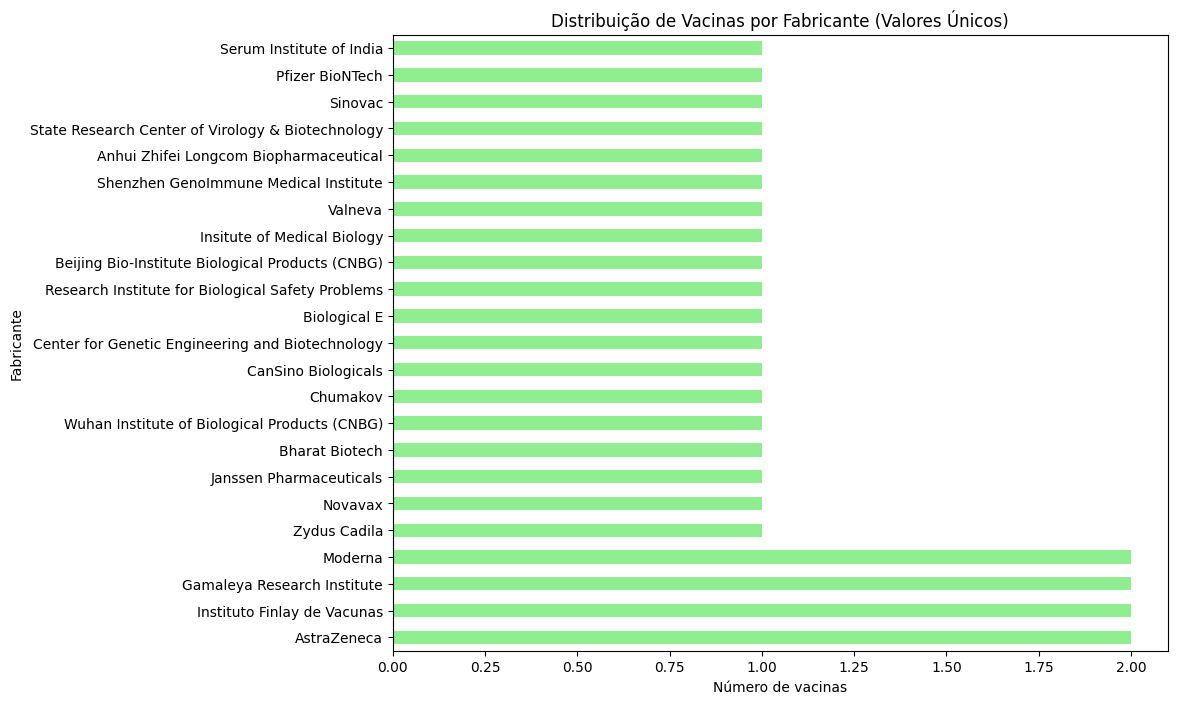

In [186]:
# Criar um gáfico de barras horizontais
df_unique['COMPANY_NAME'].value_counts().plot(kind='barh', figsize=(10,8), color='lightgreen')
plt.title('Distribuição de Vacinas por Fabricante (Valores Únicos)')
plt.xlabel('Número de vacinas')
plt.ylabel('Fabricante')
plt.show()

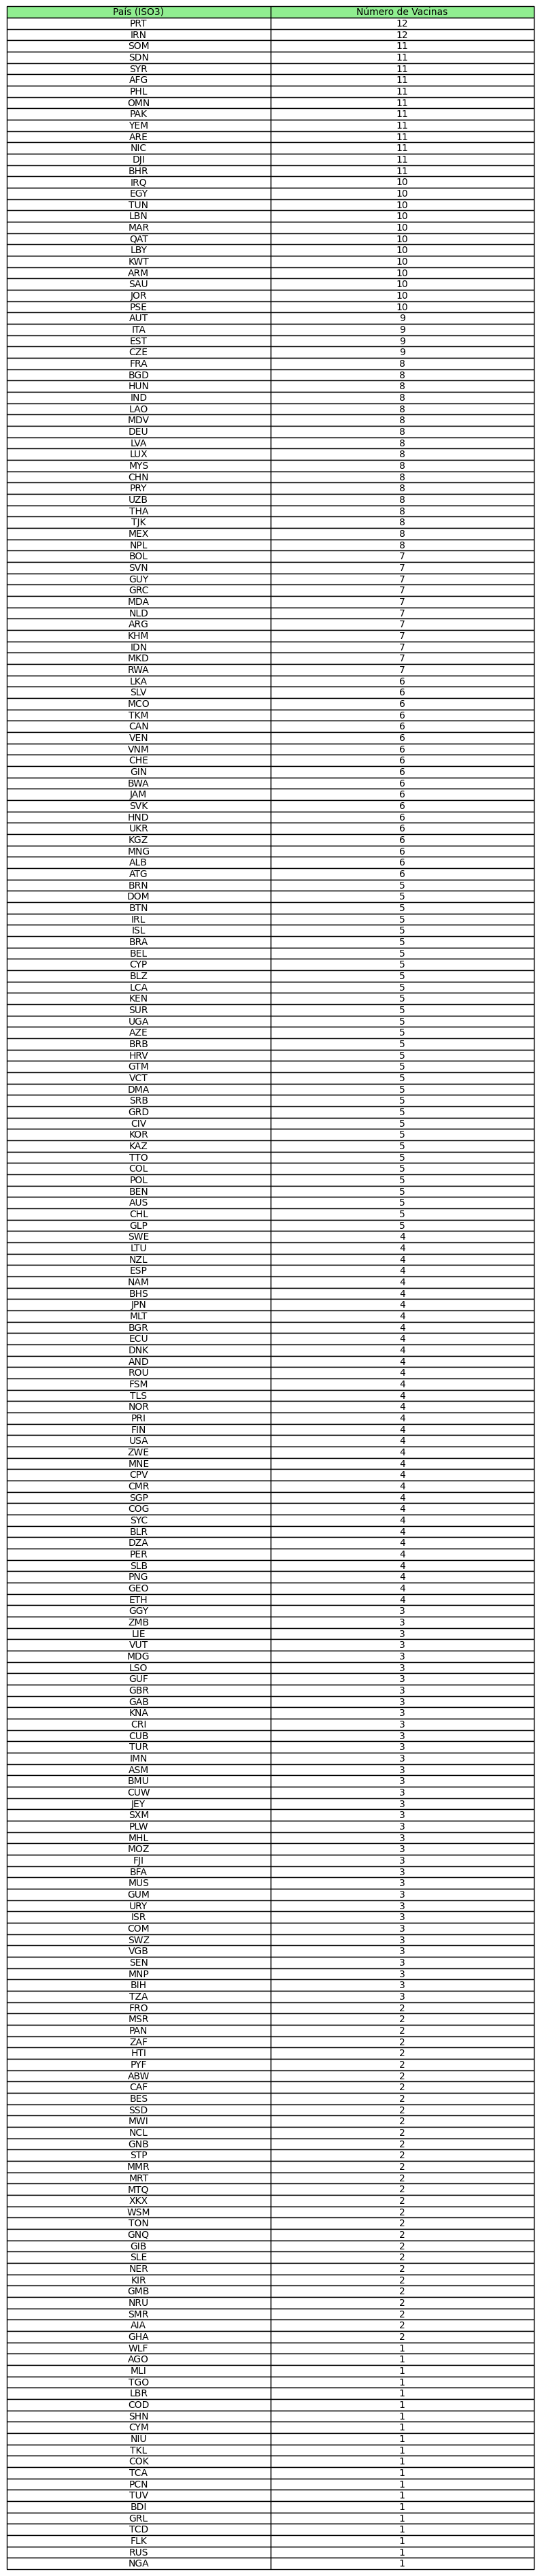

In [184]:
# Remover dados duplicados e contar vacinas por país
vacinas_por_pais = df.drop_duplicates(subset=['ISO3','VACCINE_NAME'])['ISO3'].value_counts()

# Criar uma tabela com as contagens de vacinas por país
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table_data = vacinas_por_pais.reset_index().values.tolist()
columns = ['País (ISO3)', 'Número de Vacinas']
colColours = ['lightgreen', 'lightgreen']
ax.table(cellText=table_data, colLabels=columns, colColours=colColours, cellLoc='center', loc='center')
plt.show()

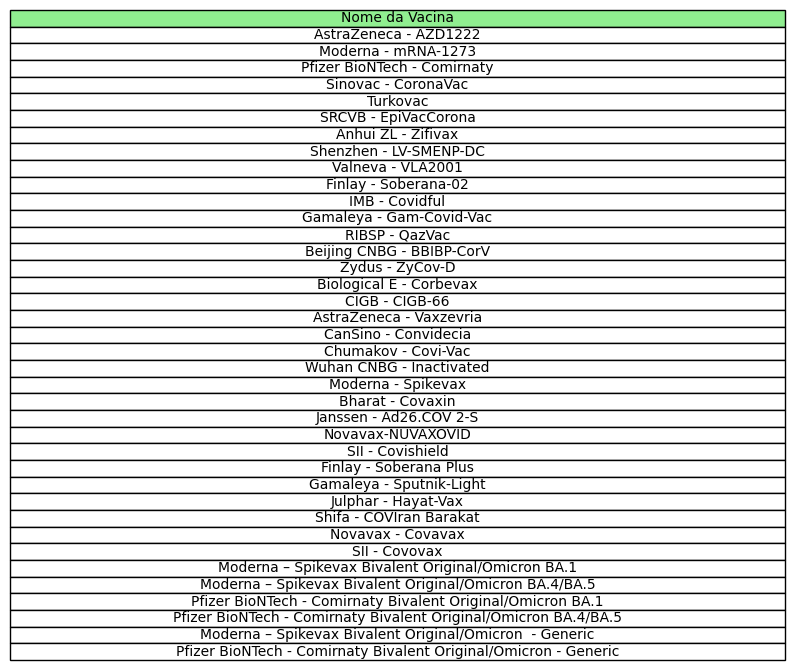

In [187]:
# Remover dados duplicados e contar vacinas por nome
vacinas_por_nome = df.drop_duplicates(subset=['VACCINE_NAME'])['VACCINE_NAME'].unique()

# Converter o resultado para uma lista
table_data = [[nome] for nome in vacinas_por_nome]

# Criar tabela
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
colColours = ['lightgreen']
columns = ['Nome da Vacina']
ax.table(cellText=table_data, colLabels=columns, colColours=colColours, cellLoc='center', loc='center')
plt.show()

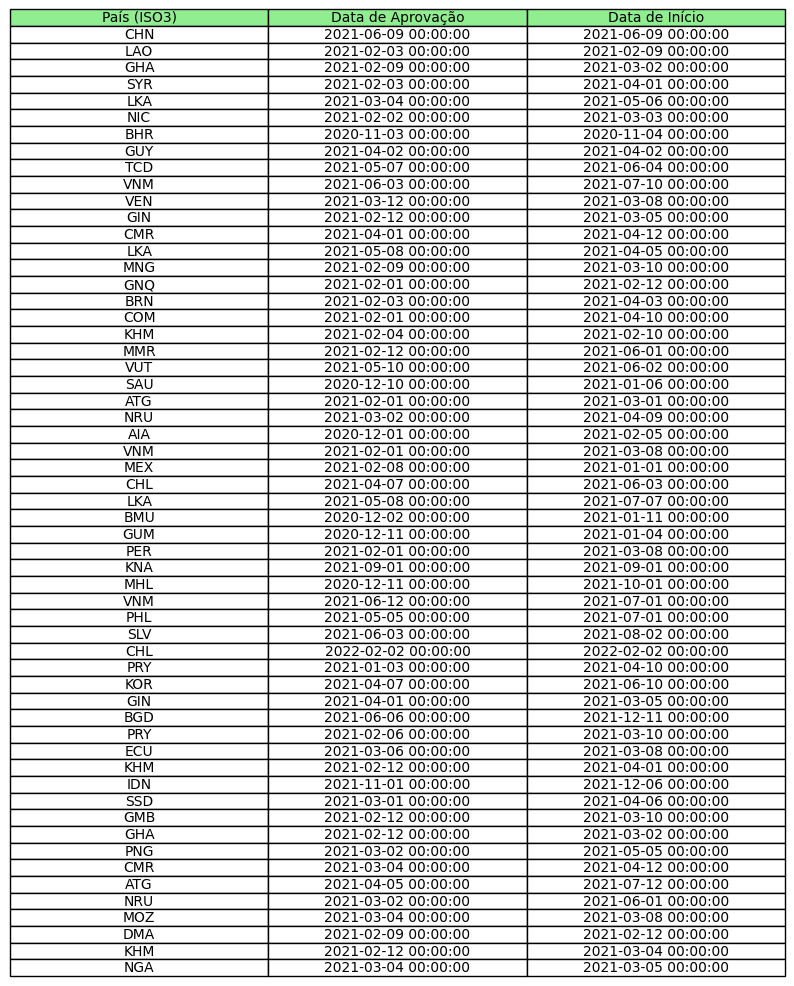

Total de países com vacinas que tem data de aprovação e início: 57


In [252]:
# Criar uma tabela que mostre todos os países que possuem data de aprovação e de início

# Filtrar apenas as linhas onde AUTHORIZATION_DATE e START_DATE não são nulas
df_filtered = df.dropna(subset=['AUTHORIZATION_DATE', 'START_DATE'])

# Criar uma tabela com os países que possuem data de aprovação e início
paises_com_datas = df_filtered[['ISO3', 'AUTHORIZATION_DATE', 'START_DATE']].drop_duplicates()
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table_data = paises_com_datas.values.tolist()
columns = ['País (ISO3)', 'Data de Aprovação', 'Data de Início']
colColours = ['lightgreen'] * 3
ax.table(cellText=table_data, colLabels=columns, colColours=colColours, cellLoc='center', loc='center')
plt.show()

# Total de países que possuem as duas datas
total_paises_com_datas = len(paises_com_datas)
print(f"Total de países com vacinas que tem data de aprovação e início: {total_paises_com_datas}")

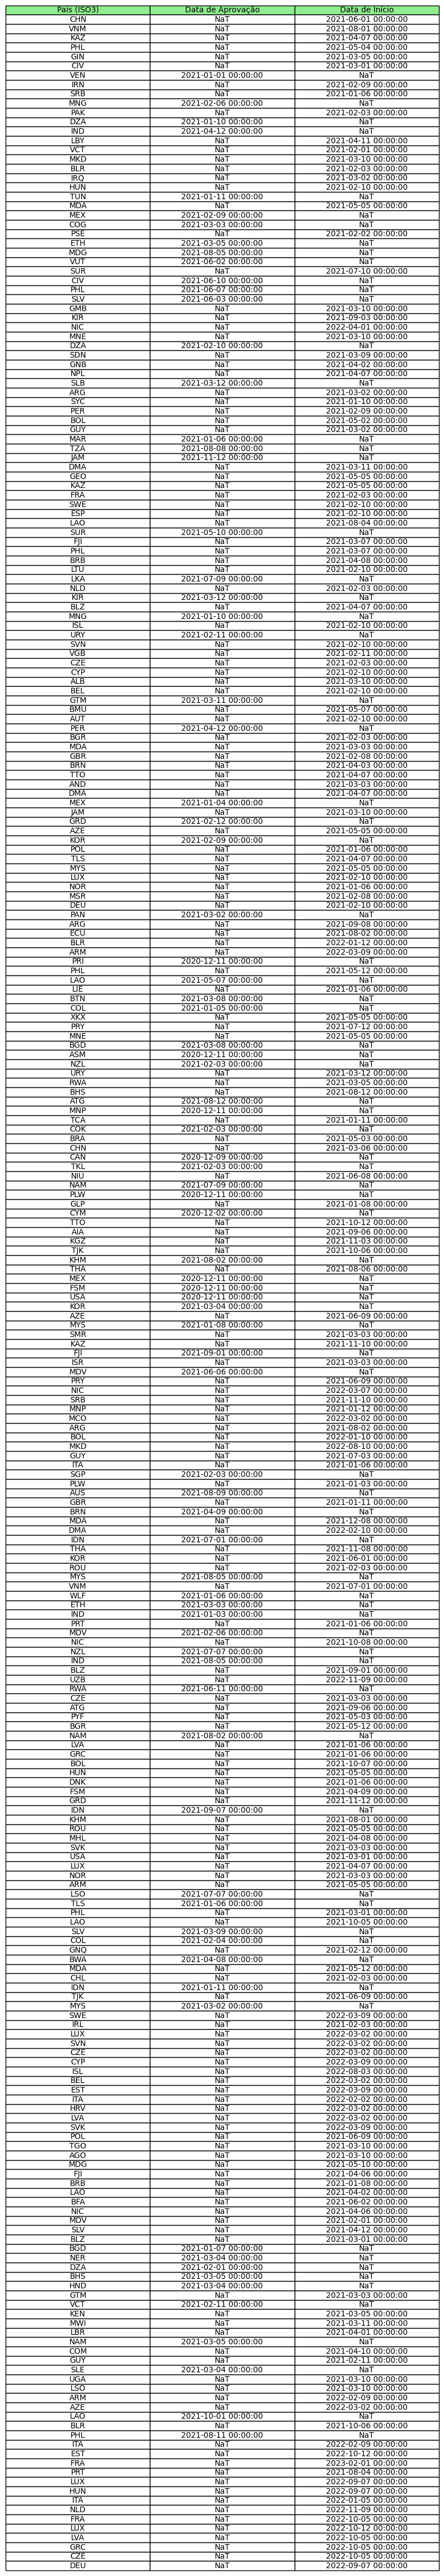

Total de países com vacinas que tem apenas data de autorização ou de início: 274


In [251]:
# Criar uma tabela que mostre os países que tem somente data de aprovação ou data de início

# Filtrar apenas as linhas onde AUTHORIZATION_DATE ou START_DATE não são nulas, mas a outra é nula
df_filtered_only_one = df[(df['AUTHORIZATION_DATE'].notna() & df['START_DATE'].isna())|(df['AUTHORIZATION_DATE'].isna() & df['START_DATE'].notna())]

# Criar uma tabela com os países que possuem apenas data de aprovação ou apenas data de início
paises_com_apenas_uma_data = df_filtered_only_one[['ISO3', 'AUTHORIZATION_DATE', 'START_DATE']].drop_duplicates()

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table_data = paises_com_apenas_uma_data.values.tolist()
columns = ['País (ISO3)', 'Data de Aprovação', 'Data de Início']
colColours = ['lightgreen'] * 3
ax.table(cellText=table_data, colLabels=columns, colColours=colColours, cellLoc='center', loc='center')
plt.show()

# Total de países que possuem apenas data de autorização ou de início
total_paises_com_apenas_uma_data = len(paises_com_apenas_uma_data)
print(f"Total de países com vacinas que tem apenas data de autorização ou de início: {total_paises_com_apenas_uma_data}")

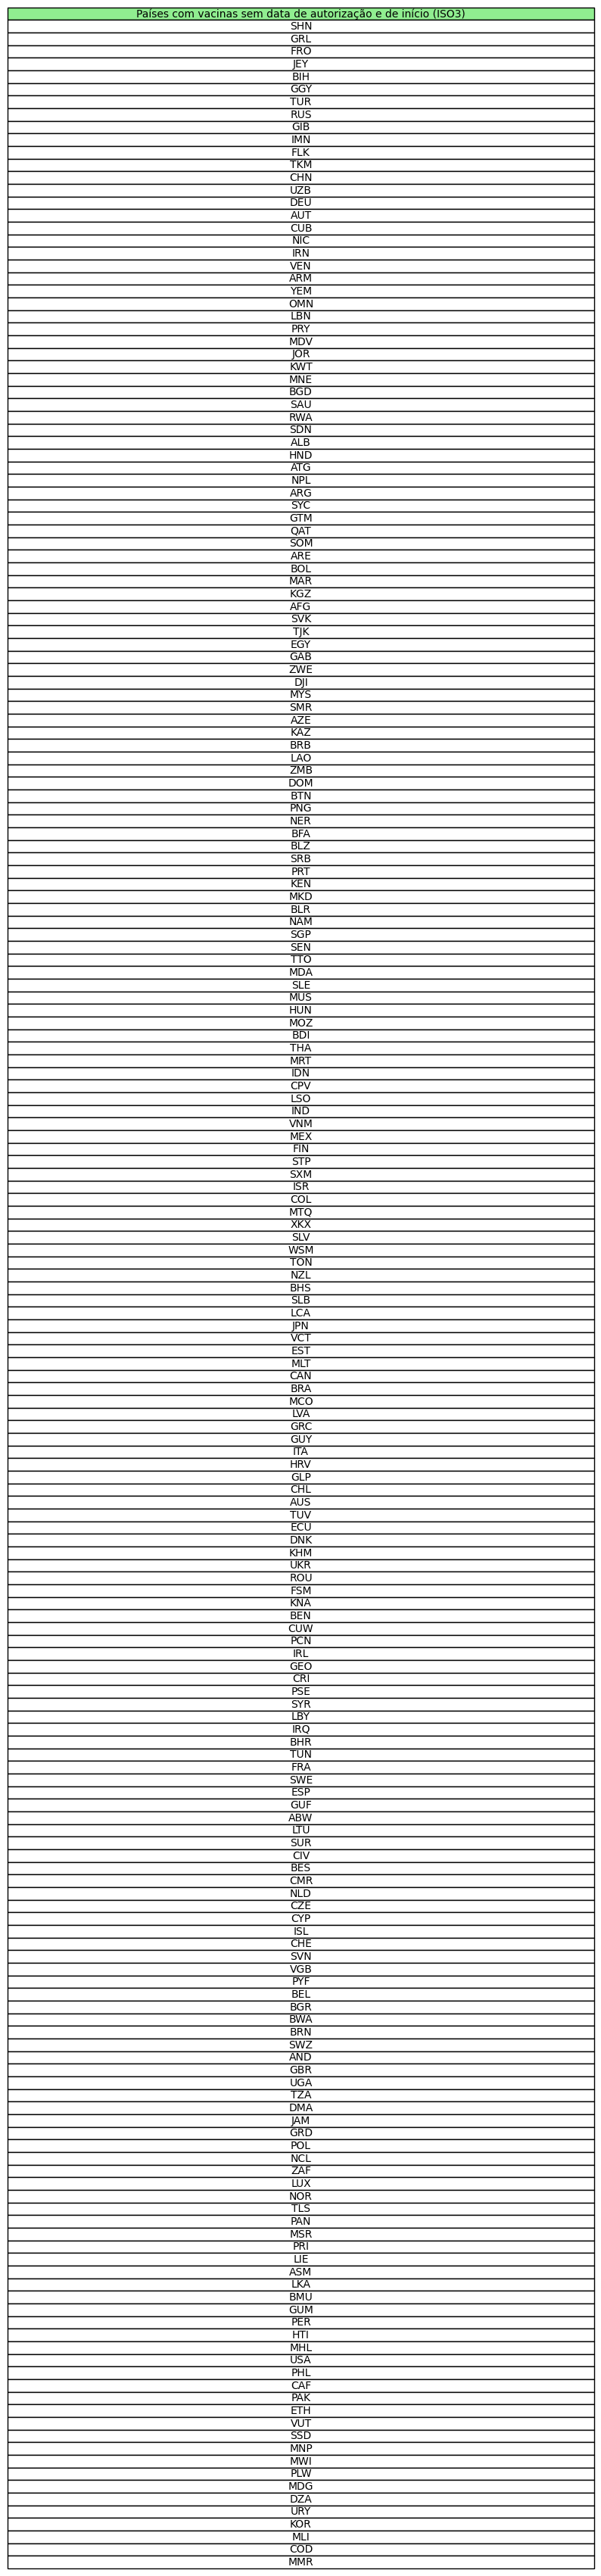

Total de países com vacinas sem data de aprovação e início: 202


In [249]:
# Criar uma tabela somente com os países que nao tem nenhuma data

# Filtrar apenas as linhas onde AUTHORIZATION_DATE e START_DATE são nulas
df_filtered_no_dates = df[(df['AUTHORIZATION_DATE'].isna() & df['START_DATE'].isna())]

# Criar uma tabela com os países que não possuem data de autorização e início
paises_sem_datas = df_filtered_no_dates[['ISO3']].drop_duplicates()
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table_data = paises_sem_datas.values.tolist()
columns = ['Países com vacinas sem data de autorização e de início (ISO3)']
colColours = ['lightgreen']
ax.table(cellText=table_data, colLabels=columns, colColours=colColours, cellLoc='center', loc='center')
plt.show()

# Total de países que não possuem nenhuma das datas
total_paises_sem_datas = len(paises_sem_datas)
print(f"Total de países com vacinas sem data de aprovação e início: {total_paises_sem_datas}")
